# Video Game Sales

This project is an analysis of video game data from 2016. This project will cover cleaning the data, performing an exploratory data analysis (EDA), and test a few hypothesis about the data. Graphs will be made to show relations between data found during the EDA.

Step 1. Open the data file and study the general information

File path:

/datasets/games.csv . Download dataset

# Import and Study Data

In [1]:
# import the data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# find info on dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Find the data types
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [5]:
# show different values in rating, platform and genre
print(games['Rating'].unique())
print(games['Platform'].unique())
print(games['Genre'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Step 2. Prepare the data

Replace the column names (make them lowercase).
Convert the data to the required types.
Describe the columns where the data types have been changed and why.
If necessary, decide how to deal with missing values:
Explain why you filled in the missing values as you did or why you decided to leave them blank.
Why do you think the values are missing? Give possible reasons.
Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

# Prepare Data

Replace Column Names and Convert Data Types

In [6]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

In [7]:
## Convert Data Types
# Convert year of release to integer
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

In [8]:
# Convert user score to numeric
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Changes made to columns include converting all names to lowercase. Data types converted include making user_score a numeric to allow for statistical analysis to be performed, year_of_release changed to integer to maintain NaN values. Both user_score and year_of_release contain coerce as error value to make errors Nan value.|

In [9]:
### Fix missing values
# Check for missing values
missing_data = games.isnull().sum()
print(missing_data)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Name and genre only have 2 missing values, we can drop those as the number is small. We will check for the critic score and user score missing values year of release, (perhaps they are all new games without critic or user reviews). 

In [10]:
# Drop rows where 'name' column has NaN values
# Drop rows where 'genre' column has NaN values
games.dropna(subset=['name', 'genre'], inplace=True)

In [11]:
# Drop rows where 'genre' column has NaN values
#games.dropna(subset=['genre'], inplace=True)

In [12]:
# Find missing values in critic and user score
missing_scores = games[games['critic_score'].isnull() | games['user_score'].isnull()]

In [13]:
# Find year of release for missing critic and user score
missing_score_year = missing_scores.groupby('year_of_release').size().reset_index(name='count_of_missing')

In [14]:
# Display the results of missing scores
missing_score_year

,year_of_release,count_of_missing
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,14
9,1989,17


Seems like our initial thought was wrong. There apprears to be missing scores in every year with some  years having more missing game scores than others. Leave the scores blank as perhaps the game wasn't rated. The TBD only seems to occur in the user_score section, we can replace it with a blank as the rating is not yet presented, the blank TBD will be treated as all other blanks. Year of release will be left blank, Rating will be changed to 'Not Rated'.

In [15]:
# Make TBD blank first before filling in blanks
games['user_score'].replace('tbd', None, inplace=True)

# Replace missing rating with 'Not Rated'
games['rating'].fillna('Not Rated', inplace=True)

In [16]:
# Check for missing values
missing_data = games.isnull().sum()
print(missing_data)

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


In [17]:
# Check for duplicates
dups = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
print(dups)
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')


                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      E  
16230       0.0         0.00          83.0         5.5      E  


In [18]:
### Caluculate Total Sales
# Caluclate total sales for all regions
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(games['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16712, dtype: float64


Looking at the increasing number of games without ratings increasing towards 2008 suggest that the games came out faster and perhaps that not all the games were reviewed on all the platforms each game came out on. The number of user scores missing compared to critic reviews missing is 8576 / 9123 = 94% suggesting the sample size is similar. This makes it reasonable for an alpha level of 5% for our hypothesis testing later on with two populations with similar size. T test should work for these groups.

Step 3. Analyze the data


# Analyze Data

In [19]:
### Games Released by Year
# find games released by year
yearly_games = games['year_of_release'].value_counts().sort_index()
print(yearly_games)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


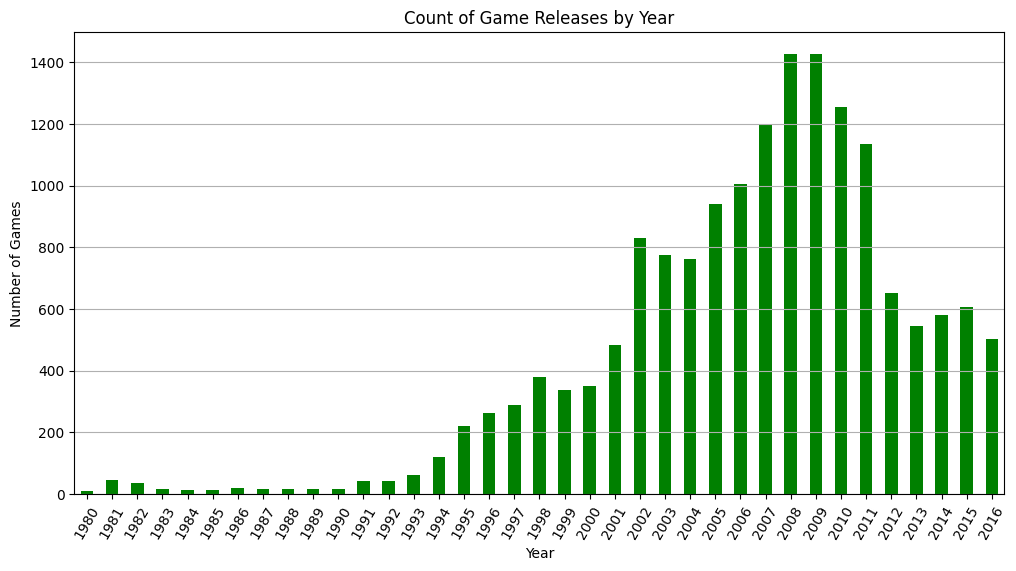

In [20]:
# create visualization of games by year
plt.figure(figsize=(12,6))
yearly_games.plot(kind='bar', color='green')
plt.title('Count of Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.show()

We will use the entire data set to find the lifecycle of platforms. We will use relevant data from 2012 to 2016 for current trend analyses as 2012 is when game releases leveled out after the 2008 booming peak.

In [21]:
### Sales by Platform Analysis
# Number of Platforms
platform_count = games['platform'].value_counts().reset_index()
print(platform_count)

   index  platform
0    PS2      2161
1     DS      2151
2    PS3      1330
3    Wii      1320
4   X360      1262
5    PSP      1209
6     PS      1197
7     PC       974
8     XB       824
9    GBA       822
10    GC       556
11   3DS       520
12   PSV       430
13   PS4       392
14   N64       319
15  XOne       247
16  SNES       239
17   SAT       173
18  WiiU       147
19  2600       133
20   NES        98
21    GB        98
22    DC        52
23   GEN        27
24    NG        12
25    WS         6
26   SCD         6
27   3DO         3
28  TG16         2
29  PCFX         1
30    GG         1


In [22]:
# total number of games released
total_games = yearly_games.sum()
print('Total games released:', total_games)
# average number of games released per year
avg_released = yearly_games.mean()
print('Average number of games released per year:', avg_released)

Total games released: 16443
Average number of games released per year: 444.4054054054054


In [23]:
### Find platforms without sales
# group by platform and total sales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values().reset_index()
print(platform_sales)

   platform  total_sales
0      PCFX         0.03
1        GG         0.04
2       3DO         0.10
3      TG16         0.16
4        WS         1.42
5        NG         1.44
6       SCD         1.86
7        DC        15.95
8       GEN        28.35
9       SAT        33.59
10      PSV        54.07
11     WiiU        82.19
12     2600        96.98
13     XOne       159.32
14       GC       198.93
15     SNES       200.04
16      N64       218.68
17      NES       251.05
18       GB       255.46
19       XB       257.74
20      3DS       259.00
21       PC       259.52
22      PSP       294.05
23      PS4       314.14
24      GBA       317.85
25       PS       730.86
26       DS       806.12
27      Wii       907.51
28      PS3       939.64
29     X360       971.42
30      PS2      1255.77


In [24]:
# Top 5 sales by platform
top_platforms = platform_sales.nlargest(5, 'total_sales')['platform']
# Group the data by year and platform to calculate total sales
platform_sales_year = games[games['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print(platform_sales_year)

platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
1985               0.02    0.00    0.00    0.00    0.00
2000               0.00   39.17    0.00    0.00    0.00
2001               0.00  166.43    0.00    0.00    0.00
2002               0.00  205.38    0.00    0.00    0.00
2003               0.00  184.31    0.00    0.00    0.00
2004              17.27  211.81    0.00    0.00    0.00
2005             130.14  160.66    0.00    0.00    8.25
2006             119.81  103.42   20.96  137.15   51.62
2007             146.94   75.99   73.19  152.77   95.41
2008             145.31   53.90  118.52  171.32  135.26
2009             119.54   26.40  130.93  206.97  120.29
2010              85.02    5.64  142.17  127.95  170.03
2011              26.18    0.45  156.78   59.65  143.84
2012              11.01    0.00  107.35   21.71   99.74
2013               1.54    0.00  113.25    8.59   88.58
2014               0.00    0.00   47.76    3.75 

<Figure size 1200x600 with 0 Axes>

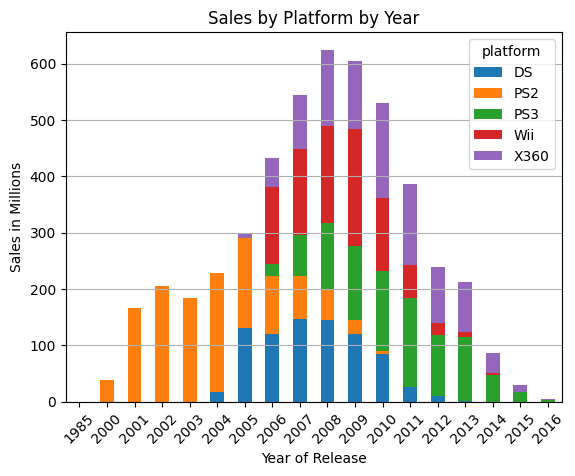

In [25]:
# visualize top yearly platforms
plt.figure(figsize=(12,6))
platform_sales_year.plot(kind='bar', stacked=True)
plt.title('Sales by Platform by Year')
plt.xlabel('Year of Release')
plt.ylabel('Sales in Millions')
plt.legend(title='platform')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Platforms that now have zero sales:


,platform,last_year
0,2600,1989
8,GG,1992
17,SCD,1994
7,GEN,1994
10,NES,1994
19,TG16,1995
1,3DO,1995
11,NG,1996
12,PCFX,1996
18,SNES,1999


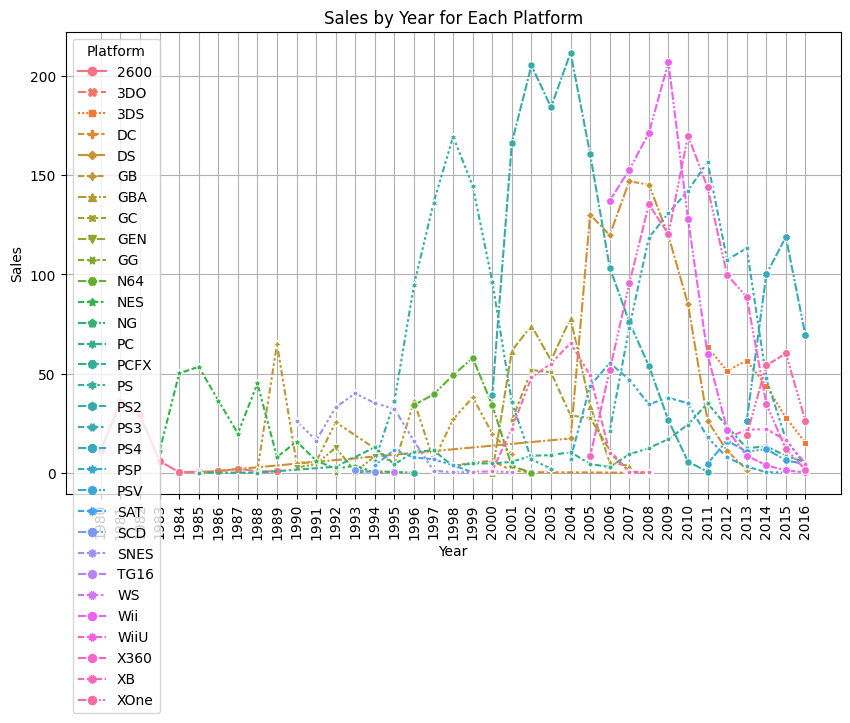

In [62]:
## Find dead platforms (no recent sales)
# Create sales by year and platform df
platform_sales_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
# Get the final year of sales for each platform
final_sales_year = platform_sales_year.groupby('platform')['year_of_release'].max().reset_index()
final_sales_year = final_sales_year.rename(columns={'year_of_release': 'last_year'})
# Get the total sales for each platform
total_sales = platform_sales_year.groupby('platform')['total_sales'].sum().reset_index()
# Merge to find platforms with zero sales in the latest year
zero_sales_platforms = total_sales[total_sales['total_sales'] > 0].merge(
    final_sales_year[final_sales_year['last_year'] < 2016], on='platform')
print("Platforms that now have zero sales:")
display(zero_sales_platforms[['platform', 'last_year']].sort_values(by='last_year'))

# Create a pivot table for better visualization
pivot_table = platform_sales_year.pivot(index='year_of_release', columns='platform', values='total_sales')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title('Sales by Year for Each Platform')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Platform')
plt.grid()
plt.xticks(pivot_table.index, rotation=90)
plt.show()

In [28]:
## Find Growing and Shrinking platforms (They currently have sales)
# Make a pivot table of platform sales by year
pivot = platform_sales_year.pivot(index='platform', columns='year_of_release', values='total_sales').fillna(0)

# Find the change in sales from 2012 (relevant data) to 2016 (last year available)
pivot['change'] = pivot[2016] - pivot[2012]
# Find leading platforms in sales
leading = total_sales.sort_values(by='total_sales', ascending=False)
# Find growing and shrinking platforms
growing = pivot[pivot['change'] > 0]
shrinking = pivot[pivot['change'] < 0]
# Find profitable platforms - they have a positive change in the last year
profitable_platforms = pivot[(pivot[2016] > 0) & (pivot['change'] > 0)]
print("Leading Platforms in Total Sales:")
display(leading)

print("Growing Platforms:")
display(growing[['change']])

print("Shrinking Platforms:")
display(shrinking[['change']])

print("Profitable Platforms:")
display(profitable_platforms[['change', 2016]])

Leading Platforms in Total Sales:


,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Growing Platforms:


year_of_release,change
platform,
PS4,69.25
XOne,26.15


Shrinking Platforms:


year_of_release,change
platform,
3DS,-36.22
DS,-11.01
PC,-17.97
PS3,-103.75
PSP,-7.69
PSV,-11.94
Wii,-21.53
WiiU,-12.96
X360,-98.22


Profitable Platforms:


year_of_release,change,2016
platform,,
PS4,69.25,69.25
XOne,26.15,26.15


<Figure size 1200x600 with 0 Axes>

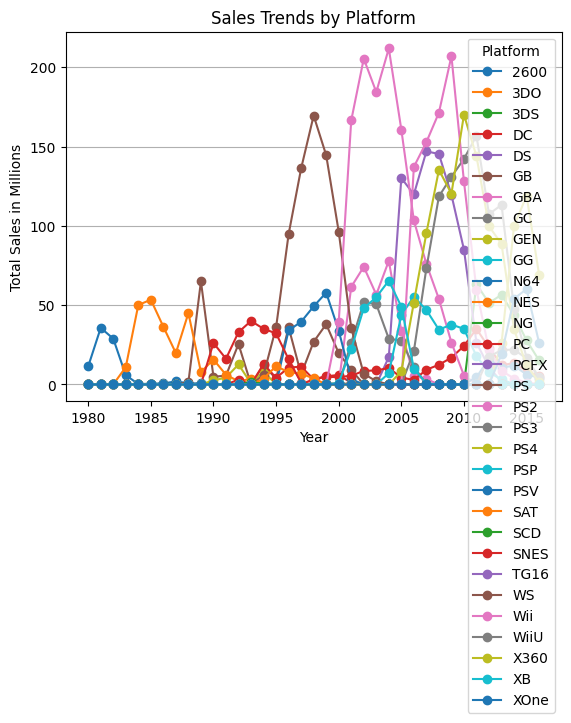

In [ ]:
# Group by platform and year, summing the total sales
grouped_sales = platform_sales_year.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Pivot the DataFrame to get years as index and platforms as columns
pivot_sales = grouped_sales.pivot(index='year_of_release', columns='platform', values='total_sales').fillna(0)

# Plotting
plt.figure(figsize=(12, 9))
pivot_sales.plot(kind='line', marker='o')
plt.title('Sales Trends by Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales in Millions')
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()

Platforms that used to be popular but no longer exist are 2600, 3DO (popular as they are one of the first platforms), GB was popular until replaced by GBA which was popular until being replaced by NS( never reached highest single yearly sales as GBA), PS2 was most popular system that no longer has sales.

In [29]:
## Find the average lifecycle of platforms (max - min sales year)
lifespan = platform_sales_year.groupby('platform')['year_of_release'].agg(['max', 'min']).reset_index()
# make lifecycle column to input lifecycle
lifespan['lifecycle'] = lifespan['max']- lifespan['min']
# avg lifecycle 
avg_lifecycle = lifespan['lifecycle'].mean()
print('The average lifecycle for platforms is:', avg_lifecycle, 'years')

The average lifecycle for platforms is: 7.612903225806452 years


Data Analysis based on relevant sales = games release after 2011

In [30]:
# based on platform sales by year, filter data to be only post 2011
relevant_games = games[(games['year_of_release'] > 2011)]

In [31]:
# find leading sales by platform based on filtered data
top_platforms = relevant_games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print('Top 5 platforms in sales:')
print(top_platforms.head(5))

Top 5 platforms in sales:
   platform  total_sales
4       PS4       314.14
3       PS3       288.78
9      X360       236.54
0       3DS       194.61
10     XOne       159.32


<Figure size 1200x600 with 0 Axes>

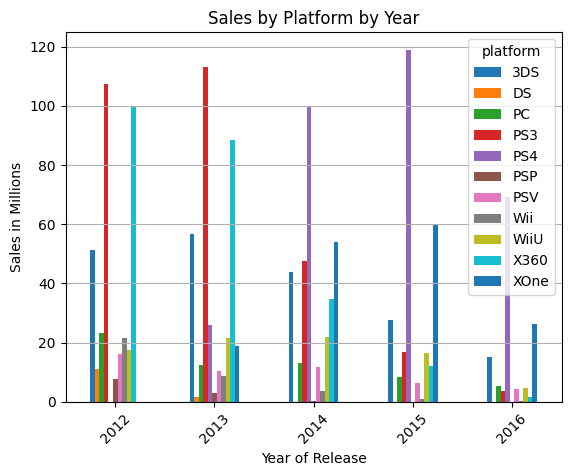

In [57]:
# make chart with sales for new df
relevant_sales = relevant_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
pivot_relevant = relevant_sales.pivot(index='year_of_release', columns='platform', values='total_sales').fillna(0)

# visualize top yearly platforms
plt.figure(figsize=(12,6))
pivot_relevant.plot(kind='bar', stacked=False)
plt.title('Sales by Platform by Year')
plt.xlabel('Year of Release')
plt.ylabel('Sales in Millions')
plt.legend(title='platform')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

PS4 and XboxOne are promising and show growth in total sales in our relevant data timeframe (2012-2016)

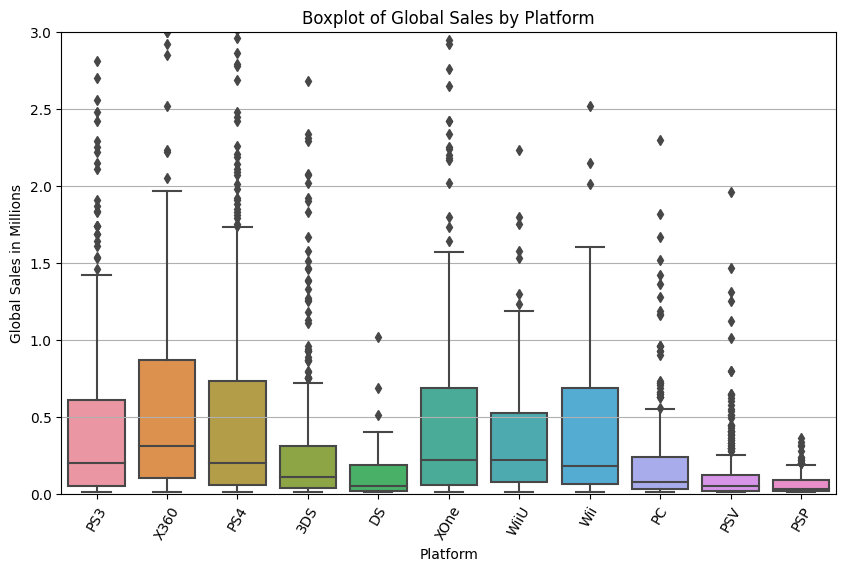

In [33]:
# Build a box plot for global sales of games by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_games)
plt.title('Boxplot of Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales in Millions')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.ylim(0,3)
plt.show()

Xbox 360 has the highest median sales, PSP has the lowest sales and lowest amount of outliers suggesting only a few games are popular for that platform. The newer platforms (Xbox 360 / One, PS 3 / 4) have a number of high outliers increasing sales.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? Compare the sales of the same games on other platforms.

In [34]:
# Find average sales on platforms
plat_sales = relevant_games.groupby('platform').agg(total_game_sales=('total_sales', 'sum'), num_games=('total_sales', 'count'), avg_sales=('total_sales', 'mean')).reset_index()
##plat_sales['avg_sales'] = plat_sales['total_game_sales'] / plat_sales['num_games']
display(plat_sales.sort_values(by='avg_sales', ascending=False))


,platform,total_game_sales,num_games,avg_sales
9,X360,236.54,292,0.810068
4,PS4,314.14,392,0.801378
7,Wii,35.37,54,0.655000
10,XOne,159.32,247,0.645020
3,PS3,288.78,492,0.586951
8,WiiU,82.19,147,0.559116
0,3DS,194.61,396,0.491439
1,DS,12.55,31,0.404839
2,PC,62.65,250,0.250600
6,PSV,49.18,411,0.119659


Xbox360 has the highest average sales but PS4 is in second by ~0.01 %. The PS4 has 100 more games than the Xbox360. The PSP has the lowest average sales at 6.46% and also has the lowest amount of game sales

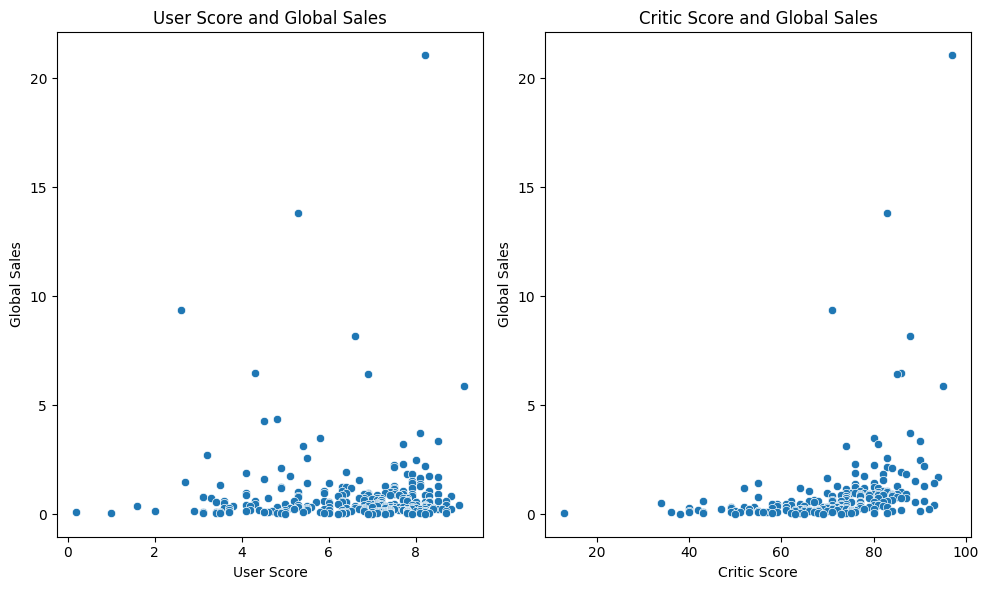

In [35]:
### Pick one platform and create scatterplot comparing user vs critic score sales
# For example, let's pick the PS3 platform
ps3 = relevant_games[relevant_games['platform'] == 'PS3']
# Create scatterplot comparing user vs critic score sales
# user score plot
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=ps3)
plt.title('User Score and Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales')

# critic score plot
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=ps3)
plt.title('Critic Score and Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.tight_layout()
plt.show()


In [36]:
# Find correlation between two plots
user_corr = ps3['user_score'].corr(ps3['total_sales'])
critic_corr = ps3['critic_score'].corr(ps3['total_sales'])
print("User score correlation:", user_corr)
print("Critic score correlation:", critic_corr)

User score correlation: -0.006205767686051499
Critic score correlation: 0.3341517575509856


In [37]:
# Find correlation between scores on Xbox360
x360 = relevant_games[relevant_games['platform'] == 'X360']

user_corr = x360['user_score'].corr(x360['total_sales'])
critic_corr = x360['critic_score'].corr(x360['total_sales'])
print("User score correlation:", user_corr)
print("Critic score correlation:", critic_corr)

User score correlation: 0.006163978646213326
Critic score correlation: 0.3605734888507336


In [38]:
# Find correlation between scores on PS4
ps4 = relevant_games[relevant_games['platform'] == 'PS4']

user_corr = ps4['user_score'].corr(ps4['total_sales'])
critic_corr = ps4['critic_score'].corr(ps4['total_sales'])
print("User score correlation:", user_corr)
print("Critic score correlation:", critic_corr)

User score correlation: -0.031957110204556424
Critic score correlation: 0.40656790206178095


Based on correlation score, User score does not indicate the sales performance of the games sold. Critic score has a moderate positive correlation with sales performance. The correlation score for Users is near 0.0 while Critic scores are between .33 - .40

In [39]:
# Compare sales of the same game on other platforms
#platform_sale = relevant_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
#sales_compare = platform_sale.pivot(index='name', columns='platform', values='total_sales').fillna(0)
#sales_compare['total_sales'] = sales_compare.sum(axis=1)
#sales_compare_sort = sales_compare.sort_values(by='total_sales', ascending=False)
#display(sales_compare_sort)


In [40]:
# Distribution of games by genre
genre_dist = relevant_games['genre'].value_counts()
print('Distribution of games by genre:')
print(genre_dist)

Distribution of games by genre:
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64


In [41]:
# Find most profitable genre
genre_sales = relevant_games.groupby('genre')['total_sales'].sum().reset_index()
profit_genre = genre_sales.sort_values(by='total_sales', ascending=False)
print(profit_genre.head(3))

          genre  total_sales
0        Action       441.12
8       Shooter       304.73
7  Role-Playing       192.80


In [42]:
# Compare differences in low and high profit genres
# Calculate the average profit for each genre
genre_sales_avg = relevant_games.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    num_games=('total_sales', 'count')
).reset_index()
genre_sales_avg['avg_profit'] = genre_sales_avg['total_sales'] / genre_sales_avg['num_games']
genre_sales_avg = genre_sales_avg.sort_values(by='avg_profit', ascending=False)
print(genre_sales_avg)

           genre  total_sales  num_games  avg_profit
8        Shooter       304.73        235    1.296723
4       Platform        61.00         85    0.717647
10        Sports       181.06        267    0.678127
7   Role-Playing       192.80        370    0.521081
6         Racing        53.50        115    0.465217
3           Misc        85.04        192    0.442917
9     Simulation        35.12         80    0.439000
0         Action       441.12       1031    0.427856
2       Fighting        44.49        109    0.408165
11      Strategy        13.34         71    0.187887
5         Puzzle         4.89         28    0.174643
1      Adventure        29.43        302    0.097450


Shooter has an extremely high lead in Average Profit with relatively average number of games. Action has the highest total sales but also has a high number of games lowering average profit. Adventure games have an average number of games but a low sales causing the lowest average profit.


Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

North America User profile

In [43]:
# Find top platforms for NA
northamerica = relevant_games[relevant_games['na_sales'] > 0]
na_plat = northamerica.groupby('platform')['na_sales'].sum().nlargest(5)
display('North America User Profile by Sales') 
display(na_plat)
# Find top genre for NA
na_genre = northamerica.groupby('genre')['na_sales'].sum().nlargest(5)
display(na_genre)
# Find sales by rating for NA
na_rating = northamerica.groupby('rating')['na_sales'].sum().nlargest(5)
display(na_rating)

'North America User Profile by Sales'

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

rating
M            231.57
E            114.37
Not Rated    103.31
E10+          75.70
T             66.02
Name: na_sales, dtype: float64

European User Profile

In [44]:
# Find top platforms for Europe
eu = relevant_games[relevant_games['eu_sales'] > 0]
eu_plat = eu.groupby('platform')['eu_sales'].sum().nlargest(5)
display('European User Profile by Sales') 
display(eu_plat)
# Find top genre for Europe
eu_genre = eu.groupby('genre')['na_sales'].sum().nlargest(5)
display(eu_genre)
# Find sales by rating for Europe
eu_rating = eu.groupby('rating')['eu_sales'].sum().nlargest(5)
display(eu_rating)

'European User Profile by Sales'

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

genre
Action          170.67
Shooter         144.37
Sports           73.99
Role-Playing     62.30
Misc             37.85
Name: na_sales, dtype: float64

rating
M            193.96
E            113.02
Not Rated     91.50
E10+          55.37
T             52.96
Name: eu_sales, dtype: float64

Japan User Profile

In [45]:
# Find top platforms for JP
jp = relevant_games[relevant_games['jp_sales'] > 0]
jp_plat = jp.groupby('platform')['jp_sales'].sum().nlargest(5)
display('Japan User Profile by Sales') 
display(jp_plat)
# Find top genre for JP
jp_genre = jp.groupby('genre')['jp_sales'].sum().nlargest(5)
display(jp_genre)
# Find sales by rating for JP
jp_rating = jp.groupby('rating')['jp_sales'].sum().nlargest(5)
display(jp_rating)

'Japan User Profile by Sales'

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

rating
Not Rated    108.84
E             28.33
T             26.02
M             21.20
E10+           8.19
Name: jp_sales, dtype: float64

Europe and North America have much higher sales than Japan, love the action genre and have high sales in M rating followed by E rating. Europe has higher sales in PS4 and PS3 than Xbox360 and ONE suggesting customer loyalty between console generations. North America has Xbox360 as highest seller and XboxOne behind PS3 and PS4 suggesting some xbox 360 customers changed to PS4 when upgrading consoles. Japan has 3DS dominating the market with over 2x sales of second place PS3 and Role playing as favorite genre.


Step 5. Test the following hypotheses:

—Average user ratings of the Xbox One and PC platforms are the same. 

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses 

—What significance level you chose to test the hypotheses, and why

# Hypothesis Testing

In [46]:
# Hypothesis Testing - Xbox one and PC average user ratings
 # H_0 - Null Hypothesis: the User rating for Xbox one and PC are equal
 # H_A - Alternative Hypothesis: the User rating for Xbox one and PC are not equal
xbox_rating = relevant_games[relevant_games['platform'] == 'XOne']['user_score'].dropna()
pc_rating = relevant_games[relevant_games['platform'] == 'PC']['user_score'].dropna()
# Calculate hypothesis test statistics
t_stat, p_value = stats.ttest_ind(xbox_rating, pc_rating)
print('T-statistic:', t_stat, 'p-value:', p_value)
# decision on P - Value
alpha = .05
if p_value < alpha:
      print("Reject the null hypothesis: The average user ratings for Xbox One and PC are different.")
else:
      print("Fail to reject the null hypothesis: No significant difference in average user ratings for Xbox One and PC.")

T-statistic: 0.5930304646661255 p-value: 0.5535080500643661
Fail to reject the null hypothesis: No significant difference in average user ratings for Xbox One and PC.


In [47]:
# Hypothesis Testing - Avg User rating for Action and Sports genres
 # H_0 - Null Hypothesis: Average User rating for Action and Sports genre are the same
 # H_A - Alternative Hypothesis: Average User rating for Action and Sports genre are different
action_rating = relevant_games[relevant_games['genre'] == 'Action']['user_score'].dropna()
sports_rating = relevant_games[relevant_games['genre'] == 'Sports']['user_score'].dropna()
# Calculate hypothesis test statistic
t_stat, p_value = stats.ttest_ind(action_rating, sports_rating)
print('T-statistic:', t_stat, 'p-value:', p_value)
# P value decision
alpha = 0.05
if p_value < alpha:
    print('Reject H_0: Average User rating for Action and Sports genre are different')
else:
    print('Fail to reject H_0: Average User rating for Action and Sports genre are the same')

T-statistic: 10.984175532598625 p-value: 4.8045233804629176e-26
Reject H_0: Average User rating for Action and Sports genre are different


As there were 2 different groups, I decided to use an independent t test. Alpha value set at .05 for general significance. Both hypothesis started as assuming the groups were the same. The action v sports genre hypothesis was rejected , indicating that there was a significant difference between the two groups user score at the significance level chosen. The XboxOne v PC platform user rating hypothesis was failed to reject as there is no significant differenece between the platforms User rating.



Step 6. Write a general conclusion

Conclusion
PS2 has the most sales but is no longer an active platform. The average platform lifespan is about 9 years. Action games are loved by gamers, but the market is saturated. ESRB Rating 'M' is the most sold rating. The critic and user scores are not highly correlated. If selling an action or sports game, focus selling in North America and Europe with promsing platform (PS4 and Xbox One). If focusing in Japan, consider releasing on a role playing or action game on the 3DS. There is a difference between action v sports genre user scores but user scores are not significantly different between PC and XboxOne platforms.
Japan is a lower selling market with 3DS leading the platform game sales, mainly in role playing and action games.
European customers are more loyal to PS as shown by both PS3 and PS4 outselling the Xbox360 and XboxOne.
North American customers seem to have an action addiction as action and shooter lead the genre charts.
It would be interesting to see how the Not Rated games change the distibution once their ratings were updated. Currently M rated games thrive in Europe and North America followed by E rating while Japan has a lower preference for M rated games. 